# Dancer's business - 3. EDA of local statistics and combine statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/dance2.csv')

In [3]:
# Area to look
area = ['LA','SanFran','Seattle','NY','Chicago','All'] # All: U.S.

# Population, Consumer Price Index (CPI), and Cost of Living Index (CLI)

## Local population over years

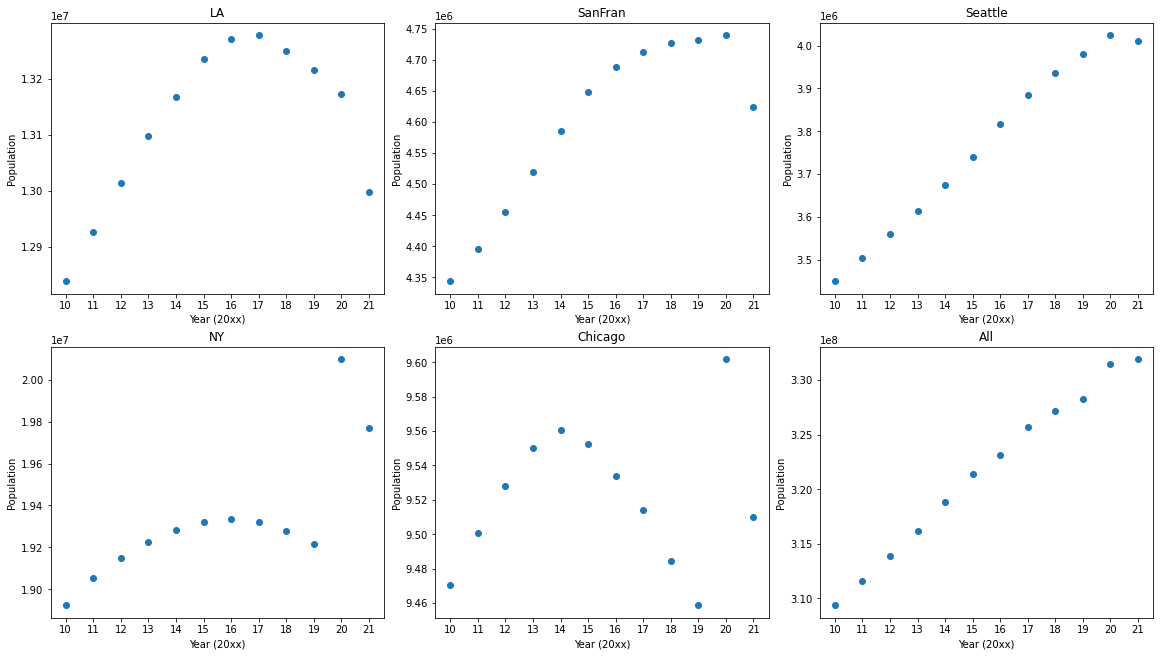

In [4]:
# Plot population

plt.rcParams["figure.figsize"] = [16, 9]
fig, ax_arr = plt.subplots(2,3,constrained_layout=True)


for i in range(len(area)):
    
    ax = ax_arr[i//3,i%3]
    
    t = df[(df.occ=='all_jobs')&(df.area==area[i])&(df.year>=2010)]

    x = t.year-2000
    y = t.population

    ax.scatter(x, y)
    ax.set_title(area[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('Population')
    _ = ax.set_xticks(np.arange(10,22, 1.0))

- While the entire U.S. population is kept growing, since 2014-2017, LA, NY, and Chicago are losing population, and San Francisco's growth is getting saturated.
- Note that 2010-2019 data are census data, where 2011-2019 are post estimate. Then data in 2020 and 2021 is new census.

## Local CPI

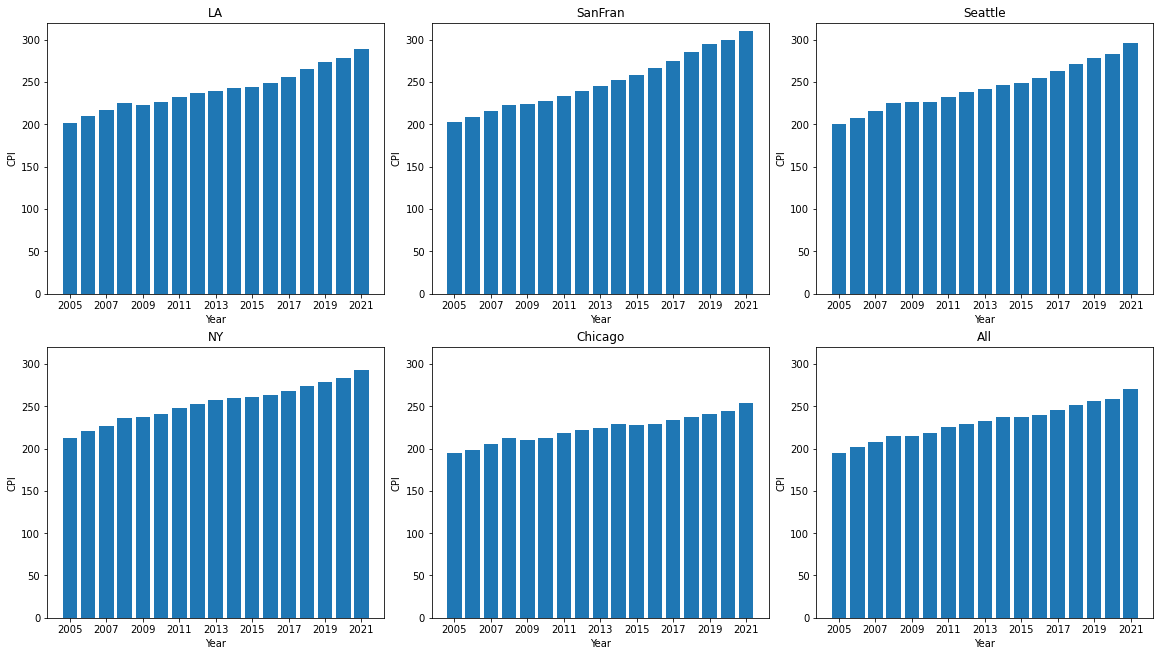

In [5]:
# Plot CPI

plt.rcParams["figure.figsize"] = [16, 9]
fig, ax_arr = plt.subplots(2,3,constrained_layout=True)


for i in range(len(area)):
    
    ax = ax_arr[i//3,i%3]
    
    t = df[(df.occ=='all_jobs')&(df.area==area[i])&(df.year>=2005)]

    x = t.year
    y = t.cpi

    ax.bar(x, y)
    ax.set_ylim(0,320)
    ax.set_title(area[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('CPI')
    _ = ax.set_xticks(np.arange(2005,2022, 2))

- San Francisco's CPI growth is the steepest whereas Chicago's CPI growth is the slowest.
- Selected city's CPI has increased by nearly 50% from 2005 to 2021, except Chicago's CPI has increaed by about 25%.

## Local CLI (2010 data)

Text(0, 0.5, 'Cost of living/CPI')

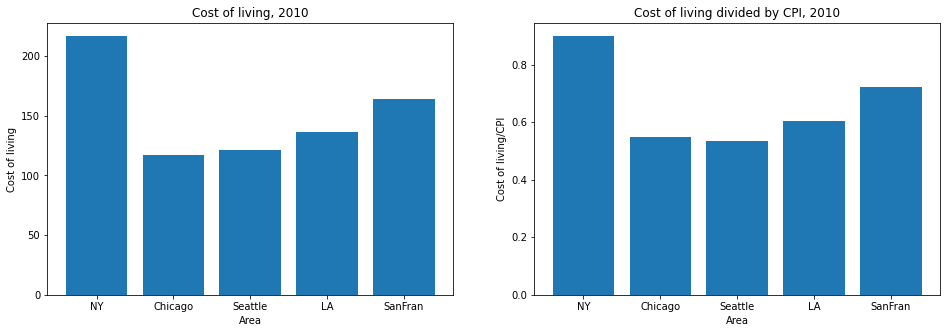

In [6]:
# Plot CLI

t = df[(df.occ=='all_jobs')&(df.area!='All')&(df.year==2010)][['area','cli','cpi']]

plt.rcParams["figure.figsize"] = [16, 5]

fig, ax_arr = plt.subplots(1,2)

# Cost of living
ax = ax_arr[0]

ax.bar(t.area, t.cli)

ax.set_title('Cost of living, 2010')
ax.set_xlabel('Area')
ax.set_ylabel('Cost of living') 

# Cost of living/CPI
ax = ax_arr[1]

ax.bar(t.area, t.cli/t.cpi)

ax.set_title('Cost of living divided by CPI, 2010')
ax.set_xlabel('Area')
ax.set_ylabel('Cost of living/CPI') 

New York is the most expensive, then San Francisco > LA > Seattle > Chicago (Chicago > Seattle if divided by CPI).

# Employee statistics

## Number of employee

In [7]:
# Convert percent error to absolute error
df['emp_err']=df.tot_emp*df.emp_prse/100

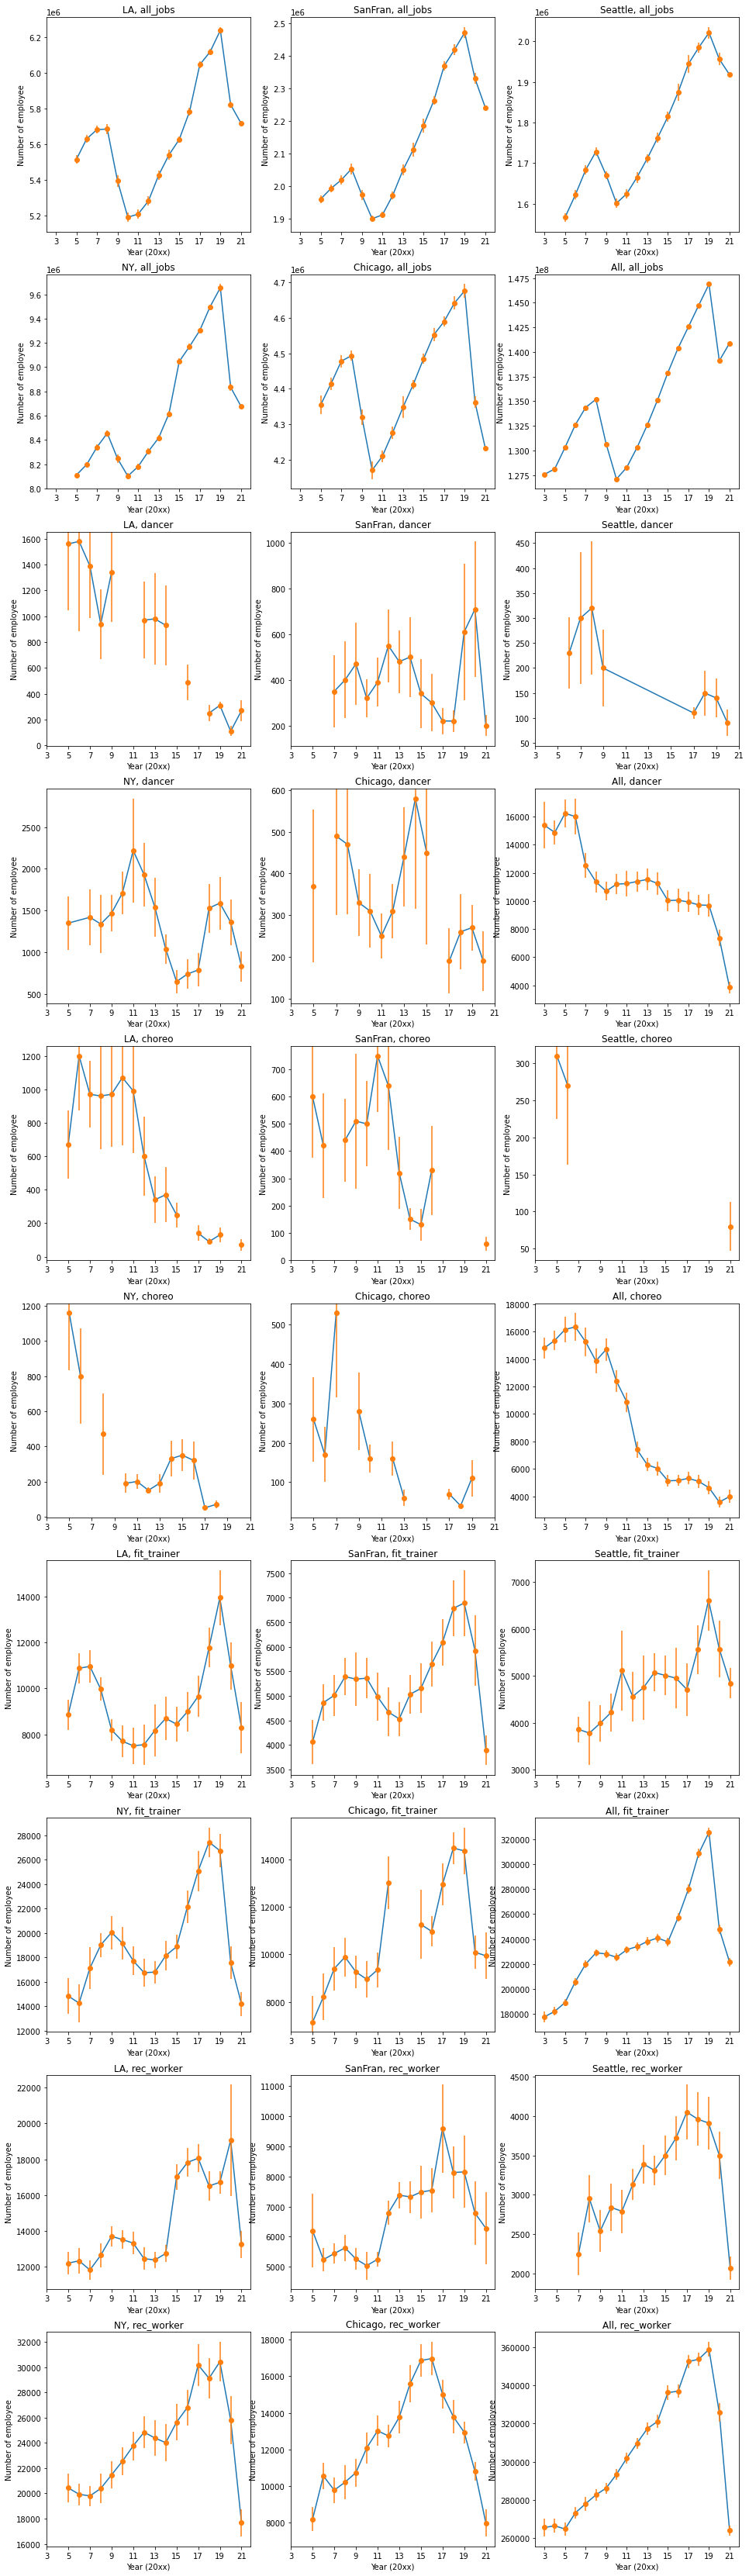

In [8]:
#%%script false --no-raise-error

# Number of employee
plt.rcParams["figure.figsize"] = [16, 60]

fig, ax_arr = plt.subplots(10,3)

ijob=0
for job in df.occ.unique():  
    
    for i in range(len(area)):  
        
        #print(job, i, ijob*2+i//3,i%3)
        
        ax = ax_arr[ijob*2+i//3,i%3]
    
        temp = df[(df.area==area[i])&(df.occ==job)&(df.year>2002)]
    
        x = temp.year-2000
        y = temp.tot_emp 
        yerr = temp.emp_err 
    
        ax.plot(x, y)
        ax.errorbar(x, y, yerr, fmt ='o')

        ax.set_title(area[i]+', '+job)
        ax.set_xlabel('Year (20xx)')
        ax.set_ylabel('Number of employee')
        ax.set_xticks(np.arange(3,22, 2))

    ijob+=1

Here, we observe
- Statistics of dancers are poor, with large uncertainties and missing data.
- On the other hand, fitness instructors data are much reliable.
- Overall, dancer population are decreasing whereas fitness population are growing, then sudden drop since 2020, from Covid19. Before make this conclusion, we will check employee population versus area resident population in order to scale the effect from decreasing/increasing area population later.

## Wage
To calculate annual employment volume (number of employee x annual wage), we need annual wage data.
This dataset provides both hourly wage and annual wage, with their mean and quartiles.
Before begin, let's see if they have too many missing data.

In [9]:
print('Annual wage data: --------\n')

print('Dancer\n', df[df.occ=='dancer'].a_mean.isna().value_counts(),'\n')
print('Choreographer\n', df[df.occ=='choreo'].a_mean.isna().value_counts(),'\n')
print('Fitness Trainer\n', df[df.occ=='fit_trainer'].a_mean.isna().value_counts(),'\n')
print('Recreational Worke\n', df[df.occ=='rec_worker'].a_mean.isna().value_counts(),'\n')


print('Hourly wage data: --------\n')

print('Dancer\n', df[df.occ=='dancer'].h_mean.isna().value_counts(),'\n')
print('Choreographer\n', df[df.occ=='choreo'].h_mean.isna().value_counts(),'\n')
print('Fitness Trainer\n', df[df.occ=='fit_trainer'].h_mean.isna().value_counts(),'\n')
print('Recreational Worke\n', df[df.occ=='rec_worker'].h_mean.isna().value_counts(),'\n')

Annual wage data: --------

Dancer
 True     92
False     1
Name: a_mean, dtype: int64 

Choreographer
 False    89
True      3
Name: a_mean, dtype: int64 

Fitness Trainer
 False    104
Name: a_mean, dtype: int64 

Recreational Worke
 False    104
Name: a_mean, dtype: int64 

Hourly wage data: --------

Dancer
 False    90
True      3
Name: h_mean, dtype: int64 

Choreographer
 False    89
True      3
Name: h_mean, dtype: int64 

Fitness Trainer
 False    104
Name: h_mean, dtype: int64 

Recreational Worke
 False    104
Name: h_mean, dtype: int64 



Annual wage data is not available for dancers. The reason is not explained at the data source. Probably because their working hours are irregular. 

Let's check average working hours for the rest of jobs, by dividing annual wage by hourly wage.

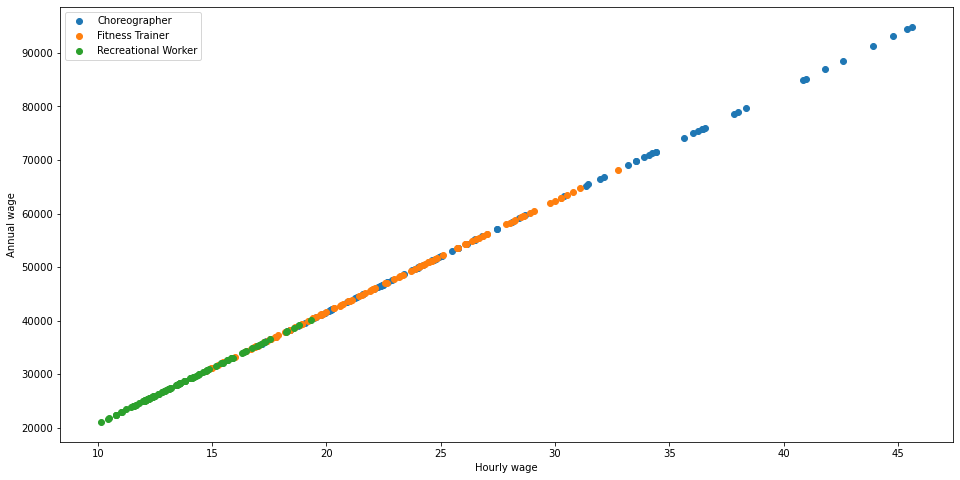

In [10]:
plt.rcParams["figure.figsize"] = [16, 8]

# Plot Choreographer hourly wage vs annual wage
temp = df[df.occ=='choreo']
plt.scatter(temp.h_mean, temp.a_mean,label='Choreographer')

# Plot Fitness Trainer hourly wage vs annual wage
temp = df[df.occ=='fit_trainer']
plt.scatter(temp.h_mean, temp.a_mean,label='Fitness Trainer')

# Plot Recreational Worker hourly wage vs annual wage
temp = df[df.occ=='rec_worker']
plt.scatter(temp.h_mean, temp.a_mean,label='Recreational Worker')

plt.ylabel('Annual wage')
plt.xlabel('Hourly wage')
plt.legend()

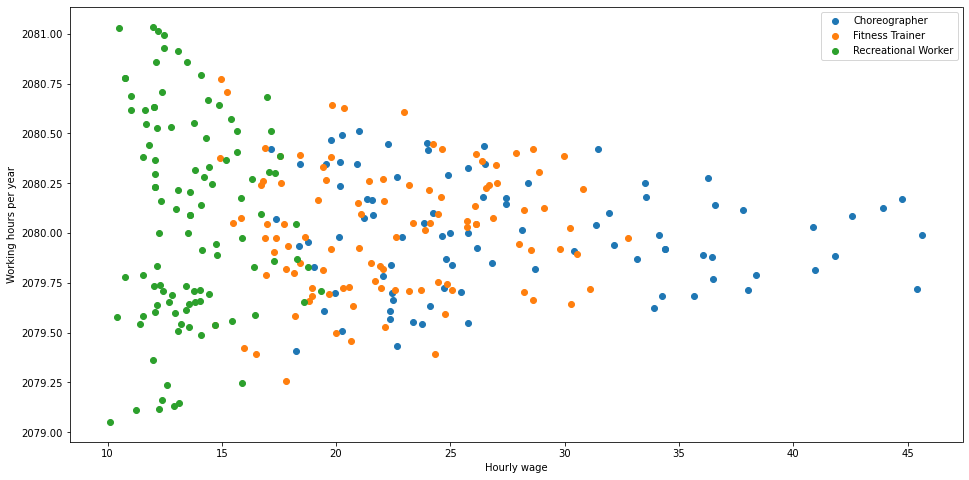

In [11]:
plt.rcParams["figure.figsize"] = [16, 8]

# Plot Choreographer hourly wage vs annual wage
temp = df[df.occ=='choreo']
plt.scatter(temp.h_mean, temp.a_mean/temp.h_mean,label='Choreographer')

# Plot Fitness Trainer hourly wage vs annual wage
temp = df[df.occ=='fit_trainer']
plt.scatter(temp.h_mean, temp.a_mean/temp.h_mean,label='Fitness Trainer')

# Plot Recreational Worker hourly wage vs annual wage
temp = df[df.occ=='rec_worker']
plt.scatter(temp.h_mean, temp.a_mean/temp.h_mean,label='Recreational Worker')

plt.ylabel('Working hours per year')
plt.xlabel('Hourly wage')
plt.legend()

From the above,
- Once annual wage is provided, their annual wage and hourly wage is highly correlated. [annual wage]/[hourly wage] values are all 2080=52(weeks)x40(hours) within an hour.
- Choreographer's income is the highest, followed by fitness worker, and then recreational worker.

In [12]:
# Convert percent error to absolute error
df['h_mean_err'] = df.h_mean*df.emp_prse/100
df['a_mean_err'] = df.a_mean*df.emp_prse/100

# For later comparison purpose, let's scale dancer's hourly wage
df.a_mean = df.apply(lambda x: x['h_mean']*2080 if x['occ']=='dancer' else x['a_mean'], axis=1)
df.a_mean_err = df.apply(lambda x: x['h_mean_err']*2080 if x['occ']=='dancer' else x['a_mean_err'], axis=1)

To explore each job's income level in detail, let's plot hourly wage statistics with quatiles and mean.

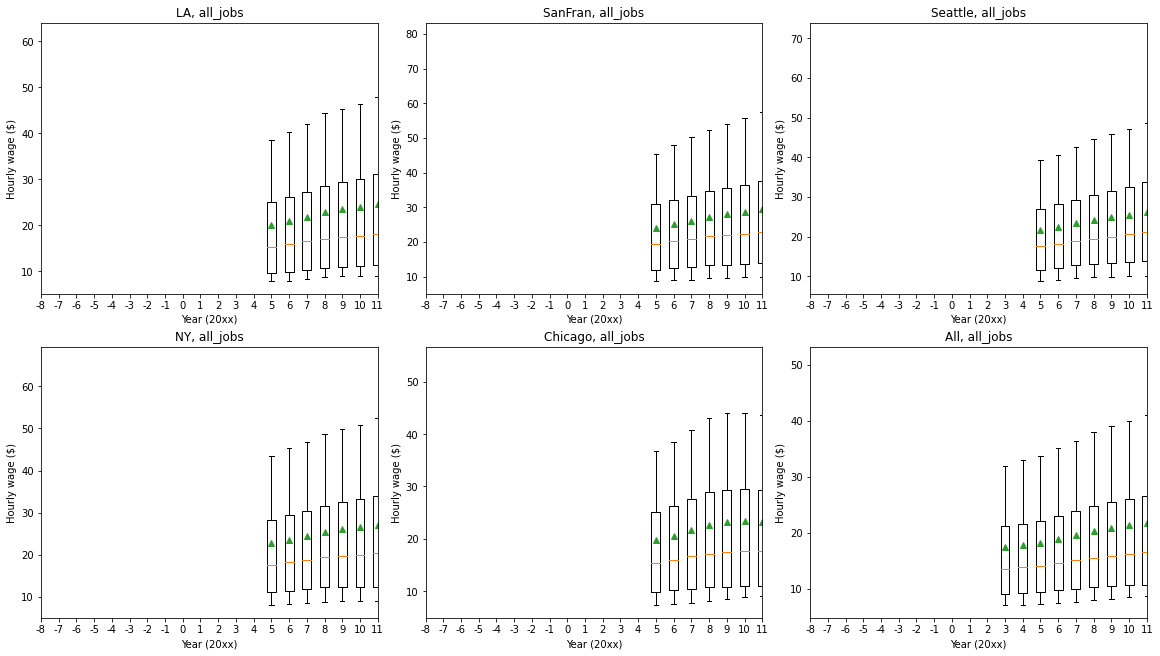

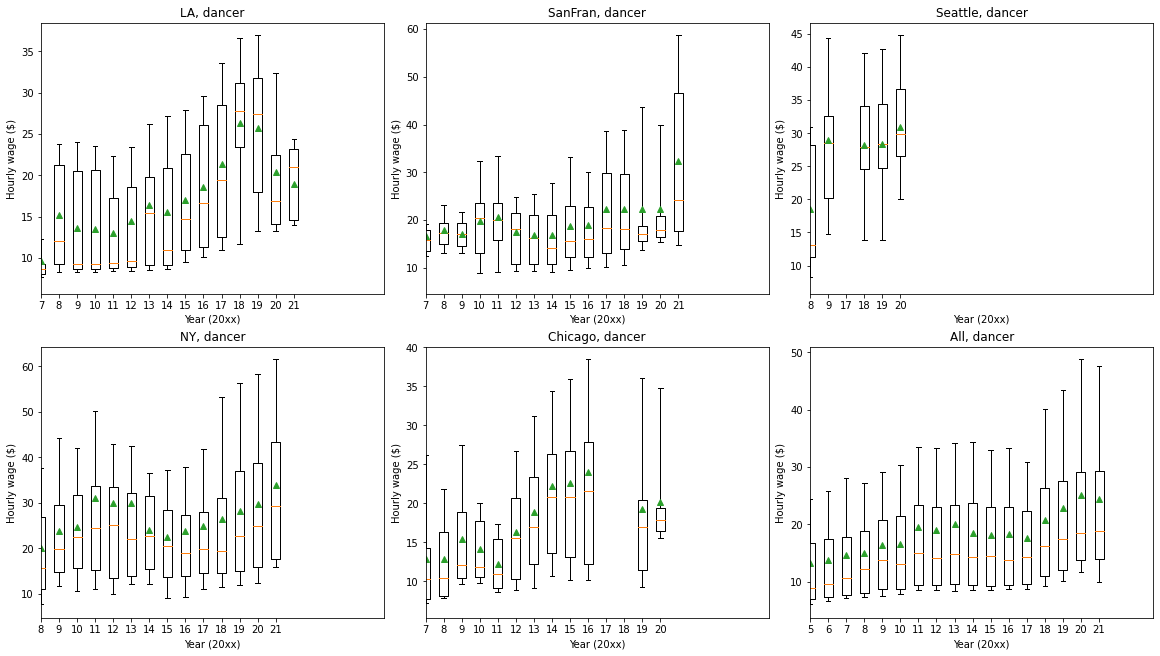

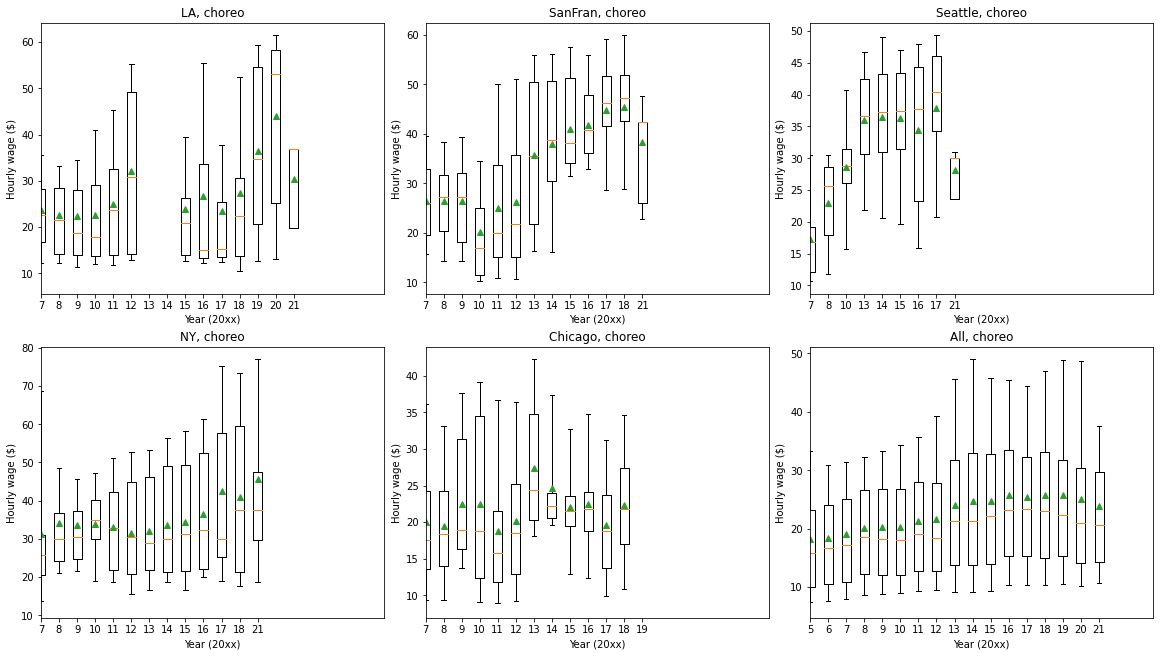

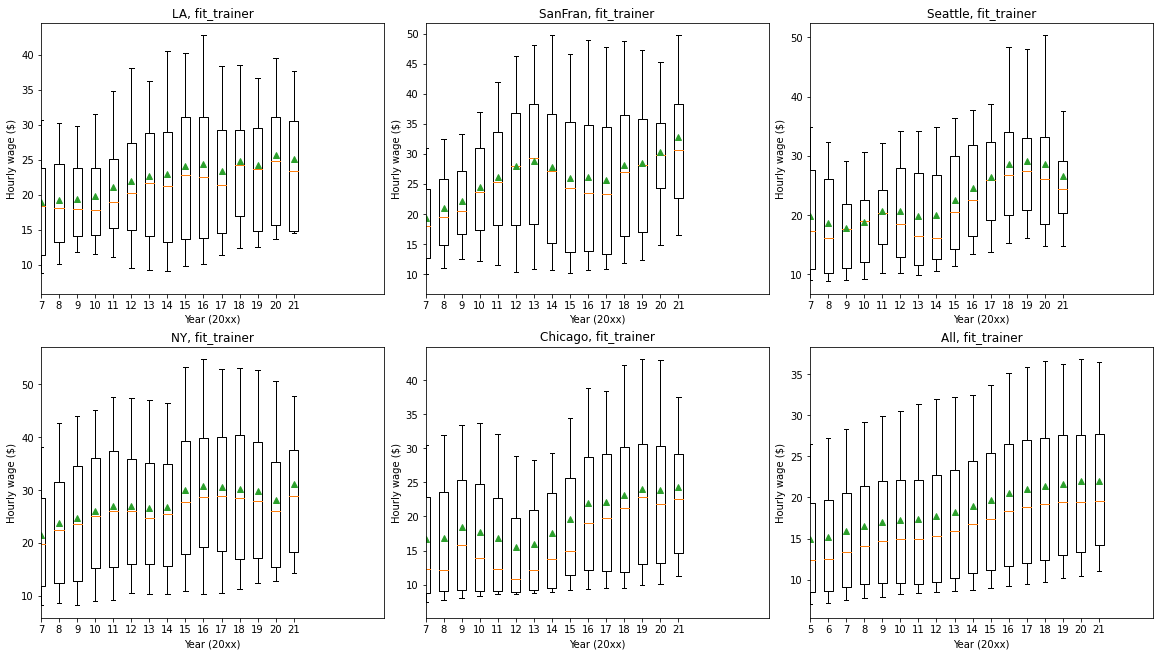

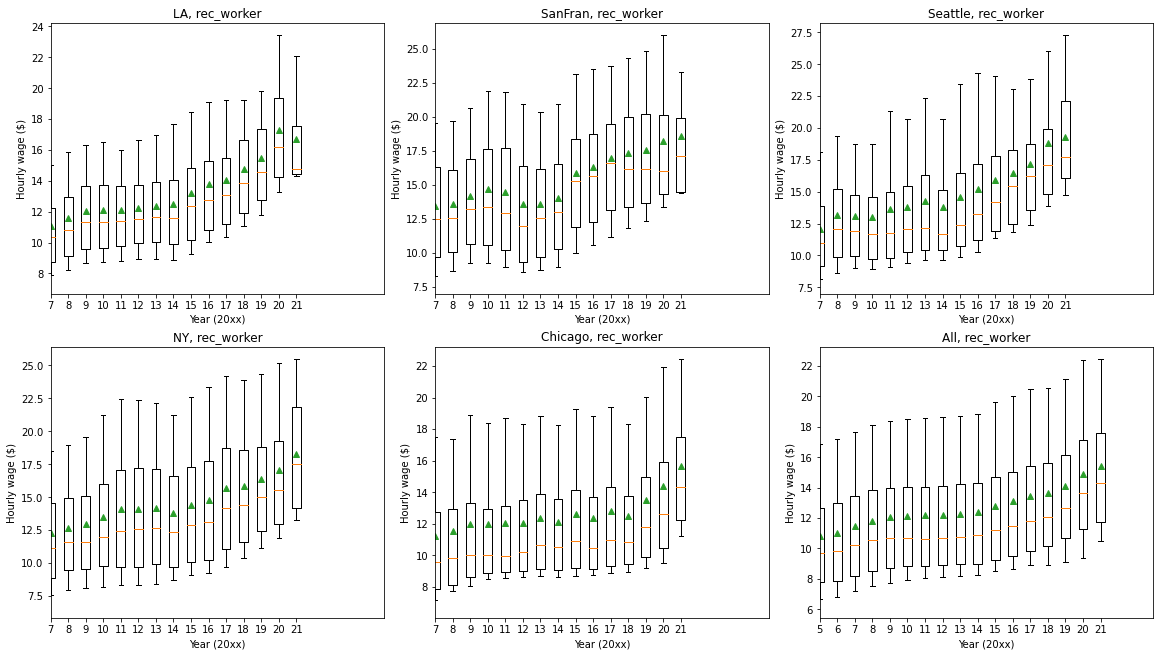

In [13]:
#%%script false --no-raise-error

# Plot hourly wage, raw data
    
plt.rcParams["figure.figsize"] = [16, 9]
for job in df.occ.unique():

    _, ax = plt.subplots(2,3, constrained_layout = True);
    
    for i in range(len(area)):  
            
        stats=[]
        
        for year in sorted(df.year.unique()):
            row = df[(df.year==year)&(df.area==area[i])&(df.occ==job)]

            if row.occ.count()!=1:
                #print("not one entry:", area, year, row.occ.count())
                pass
            else:
                mean = row.h_mean.squeeze()
                med  = row.h_median.squeeze()
                q1 = row.h_pct25.squeeze()
                q3 = row.h_pct75.squeeze()
                
                # We don't have raw data entries, so let's plot top/low 10% values instead
                whislo = row.h_pct10.squeeze()
                whishi = row.h_pct90.squeeze() 
                
                label = row.year.squeeze()-2000    

                #mean = np.log(mean)
                #med = np.log(med)
                #q1 = np.log(q1)
                #q3 = np.log(q3)
                #whislo = np.log(whislo)
                #whishi = np.log(whishi)

                stats.append({'mean':mean, 'med':med , 'q1':q1 , 'q3':q3 , 
                             'whislo':whislo , 'whishi':whishi , 'label': label}) 
                
        #print(x,iplot//3,iplot%3)
        ax[i//3,i%3].bxp(stats, showfliers=False, showmeans=True)
        ax[i//3,i%3].set_xlim(3,22)
        ax[i//3,i%3].set_title(area[i]+', '+job)
        ax[i//3,i%3].set_xlabel('Year (20xx)')
        ax[i//3,i%3].set_ylabel('Hourly wage ($)')


This is hourly wage data without any correction. Let's talk about trend after adjusting with CPI and CLI.

In [14]:
# Merge CLI/CPI in 2010 to df
t = df[(df.year==2010)&(df.occ=='all_jobs')]
t['cli_cpi'] = t.cli/t.cpi
t = t[['area','cli_cpi']]
df = df.merge(t,how='left',on=['area'])

/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_34562/3898160555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cli_cpi'] = t.cli/t.cpi


ValueError: zero-size array to reduction operation maximum which has no identity

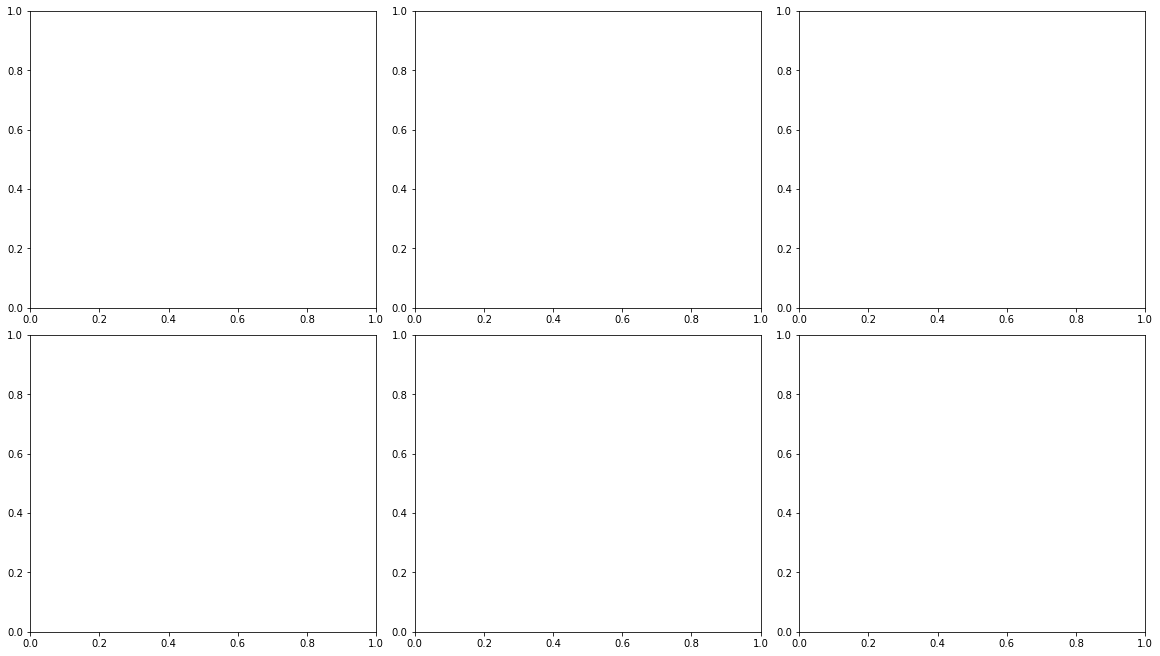

In [20]:
#%%script false --no-raise-error

# Plot hourly wage, CPI and CLI adjusted
    
plt.rcParams["figure.figsize"] = [16, 9]
for job in df.occ.unique():

    _, ax = plt.subplots(2,3, constrained_layout = True);
    
    for i in range(len(area)):  
            
        stats=[]
        
        for year in sorted(df.year.unique()):
            row = df[(df.year==year)&(df.area==area[i])&(df.occ==job)]

            if row.occ.count()!=1:
                #print("not one entry:", area, year, row.occ.count())
                pass
            else:
                
                cpi_val = row.cpi.squeeze()
                cli_adj = row.cli_cpi.squeeze()
                
                if area[i]=='All':
                    cli_adj=100
                
                mean = row.h_mean.squeeze()/cpi_val/cli_adj
                med  = row.h_median.squeeze()/cpi_val/cli_adj
                q1 = row.h_pct25.squeeze()/cpi_val/cli_adj
                q3 = row.h_pct75.squeeze()/cpi_val/cli_adj
                
                # We don't have raw data entries, so let's plot top/low 10% values instead
                whislo = row.h_pct10.squeeze()/cpi_val/cli_adj
                whishi = row.h_pct90.squeeze() /cpi_val/cli_adj
                
                label = row.year.squeeze()-2000    

                #mean = np.log(mean)
                #med = np.log(med)
                #q1 = np.log(q1)
                #q3 = np.log(q3)
                #whislo = np.log(whislo)
                #whishi = np.log(whishi)

                stats.append({'mean':mean, 'med':med , 'q1':q1 , 'q3':q3 , 
                             'whislo':whislo , 'whishi':whishi , 'label': label}) 
                
        #print(x,iplot//3,iplot%3)
        ax[i//3,i%3].bxp(stats, showfliers=False, showmeans=True)
        ax[i//3,i%3].set_xlim(3,22)
        ax[i//3,i%3].set_title(area[i]+', '+job)
        ax[i//3,i%3].set_xlabel('Year (20xx)')
        ax[i//3,i%3].set_ylabel('Hourly wage/CPI/(CLI/CPI of 2010)')


- Those plots are box plot, per area and job. The orange lines are medians and green triangles are means.
- This plot is hourly statistics, divided by local CPI in order to correct yearly growth due to inflation (fare comparison between years), then divided by local CLI/CPI of 2010, for fare comparison between area.
- Overall, seattle has the best and NY has the worst wage. However, the CLI is from 2010 data. Recent rapid growth of cost of living at Seattle is not considered.
- The all occupation average wage is flat. Indeed it is true that everything has arised except salary!
- No monotonic trend in either dancer or fitness business wages.
- Most of distributions are right skewed considering that mean is shifted to the higher quartiles.
- Fitness instructor wage in LA, San Francisco, and NY seems nearly symmetric.

# Comebine statistics -  Error propagation
What we want to get is correlation between the **employment volume** and the **revenue**.
The fitness revenue data source is saying that the **revenue** is **"fitness AND recreational sports centers"**.
Then, don't we have to **combine** the employment **statistics of fitness trainer and recreational workers**
to compare **apple to apple**?


So, let's combine statistics using the error propagation technique.
If you are curious, 
[check out the background theory from my blog](https://minjung-mj-kim.github.io/stat-num/errorpropa/). 
It is easy.



## Error propagation formula

To sum $x$ and $y$,

$$sum = x+y$$

$$sum~error = \sqrt{\sigma_x^2+\sigma_y^2}$$


To take average of $x$ and $y$,

$$weighted~mean = \frac{x/\sigma_x^2+y/\sigma_y^2}{1/\sigma_x^2+1/\sigma_y^2}$$

$$weighted~mean~error = \frac{1}{\sqrt{1/\sigma_x^2+1/\sigma_y^2}}$$


<font color=red>Here, to calculated weighted mean of wages, I assumed the uncertainty of wage comes from statistical nature, therefore, its percentage error is proportional to 1/$\sqrt{number~of~samples=tot\_emp}$.

In [16]:
# Error propagation functions
def ep_sum(x,y):
    
    return x+y

def ep_sum_err(x,y,ex,ey):
    
    return (ex**2 + ey**2)**0.5

def ep_mean(x,y,ex,ey):
    
    wx = 1/ex**2
    wy = 1/ey**2
    
    return (x*wx + y*wy)/(wx+wy)

def ep_mean_err(x,y,ex,ey):
    
    wx = 1/ex**2
    wy = 1/ey**2
        
    return (1/(wx+wy)**0.5)

### Combine jobs which might share the revenue statistics
- **dance_biz**: dancers + choreographers
- **fitness_biz**: fitness trainers + recreational workers

In [17]:
for area in df.area.unique():
    
    for year in df.year.unique():
        
        for occ in (('dance_biz','dancer','choreo'),('fitness_biz','fit_trainer','rec_worker')):
                
            d1 = df[(df.area==area)&(df.year==year)&(df.occ==occ[1])].copy()
            d2 = df[(df.area==area)&(df.year==year)&(df.occ==occ[2])].copy()
            
            if d1.empty or d2.empty:
                df = df.append({'area':area,'year':year,'occ':occ[0]},ignore_index=True)

             
            elif   (d1.tot_emp.empty    | d2.tot_emp.empty | 
                    d1.h_mean.empty     | d2.h_mean.empty |
                    d1.a_mean.empty     | d2.a_mean.empty |
                    d1.h_mean_err.empty | d2.h_mean_err.empty |
                    d1.a_mean_err.empty | d2.a_mean_err.empty):
                    
                    df = df.append({'area':area,'year':year,'occ':occ[0]},ignore_index=True)            
            else:
                
                tot_emp = ep_sum(d1.tot_emp.squeeze(), d2.tot_emp.squeeze())
                
                emp_err = ep_sum_err(d1.tot_emp.squeeze(), d2.tot_emp.squeeze(),
                                     d1.emp_err.squeeze(), d2.emp_err.squeeze())

                h_mean = ep_mean(d1.h_mean.squeeze(), d2.h_mean.squeeze(),
                                 d1.h_mean_err.squeeze(), d2.h_mean_err.squeeze())
                
                h_mean_err = ep_mean_err(d1.h_mean.squeeze(), d2.h_mean.squeeze(),
                                         d1.h_mean_err.squeeze(), d2.h_mean_err.squeeze())
                
                a_mean = np.nan
                a_mean_err = np.nan
                

                a_mean = ep_mean(d1.a_mean.squeeze(), d2.a_mean.squeeze(),
                                 d1.a_mean_err.squeeze(), d2.a_mean_err.squeeze())

                a_mean_err = ep_mean_err(d1.a_mean.squeeze(), d2.a_mean.squeeze(),
                                         d1.a_mean_err.squeeze(), d2.a_mean_err.squeeze())                

                d1.occ = occ[0]
                d1.tot_emp = tot_emp
                d1.emp_err = emp_err
                d1.h_mean = h_mean
                d1.h_mean_err = h_mean_err
                d1.a_mean = a_mean
                d1.a_mean_err = a_mean_err
                
                df = df.append(d1, ignore_index=True)

In [18]:
# Check if values are correctly calculated
df[(df.area=='NY')&(df.year==2015)][['occ','tot_emp','emp_err','a_mean','a_mean_err','h_mean','h_mean_err']]

,occ,tot_emp,emp_err,a_mean,a_mean_err,h_mean,h_mean_err
388,all_jobs,9046910.0,27140.730000,59990.000000,179.970000,28.840000,0.086520
389,dancer,650.0,141.700000,46800.000000,10202.400000,22.500000,4.905000
390,choreo,350.0,89.950000,71570.000000,18393.490000,34.410000,8.843370
391,fit_trainer,18870.0,981.240000,62370.000000,3243.240000,29.980000,1.558960
392,rec_worker,25640.0,1435.840000,30010.000000,1680.560000,14.430000,0.808080
636,dance_biz,1000.0,167.838889,52627.822483,8921.837206,25.301987,4.289384
637,fitness_biz,44510.0,1739.099895,36859.623964,1492.135270,17.723187,0.717427


# Save updated dataset

In [19]:
%%script false --no-raise-error

# Update dataset
df.to_csv('data/dance3.csv',index=False)